In [1]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score

In [2]:
df = pd.read_csv("spam.csv", encoding="utf-8", encoding_errors="ignore", )

DATA CLEANING

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [6]:
k = df[df.duplicated(subset=["v2"], keep=False)].index
df["v1"].iloc[k].value_counts()

v1
ham     503
spam    183
Name: count, dtype: int64

In [7]:
df["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
df.rename(columns={"v1": "target", "v2": "message"}, inplace=True)
df.drop_duplicates(keep="first", inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df["target"] = encoder.fit_transform(df["target"])

In [13]:
df

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will _ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


EDA --- Exploratory Data Analysis

In [14]:
df["target"].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

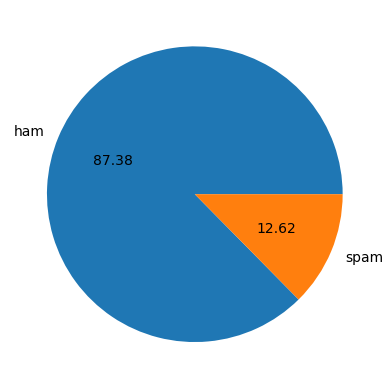

In [15]:
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

In [18]:
!pip install nltk
import nltk
nltk.data.path.append('C:/nltk_data')
nltk.download('punkt', download_dir='C:/nltk_data')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [19]:

df["num_of_characters"] = df.message.apply(len)
df["num_of_words"] = df.message.apply(lambda x: len(nltk.word_tokenize(x)))
df["num_of_sent"] = df.message.apply(lambda x: len(nltk.sent_tokenize(x)))


In [20]:
df

,target,message,num_of_characters,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4
5568,0,Will _ b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [24]:
df[["num_of_characters", "num_of_words", "num_of_sent"]].describe()

,num_of_characters,num_of_words,num_of_sent
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Figure size 1200x600 with 0 Axes>

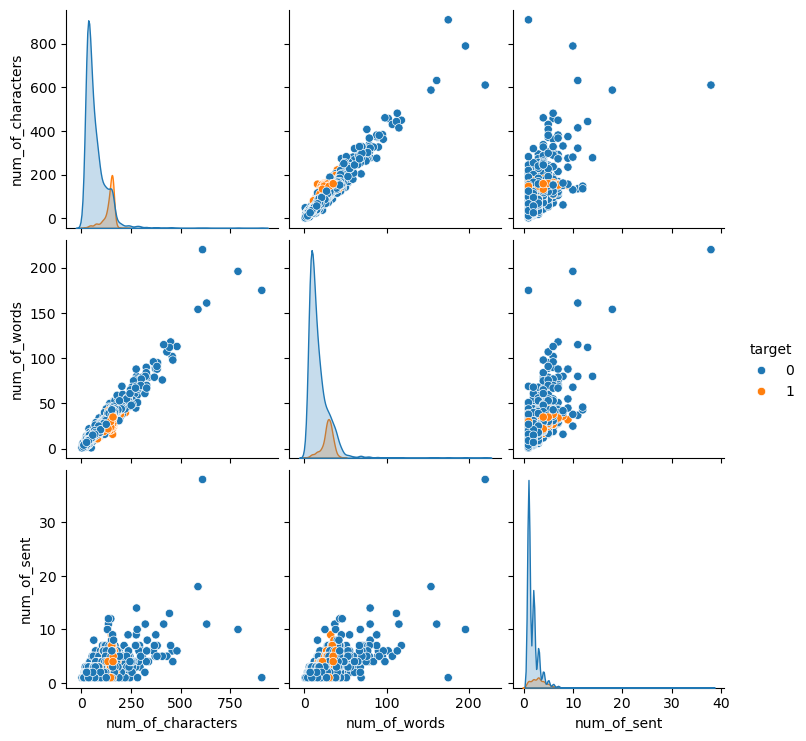

In [31]:

plt.figure(figsize=(12, 6))
sns.pairplot(df, hue="target")
plt.show()

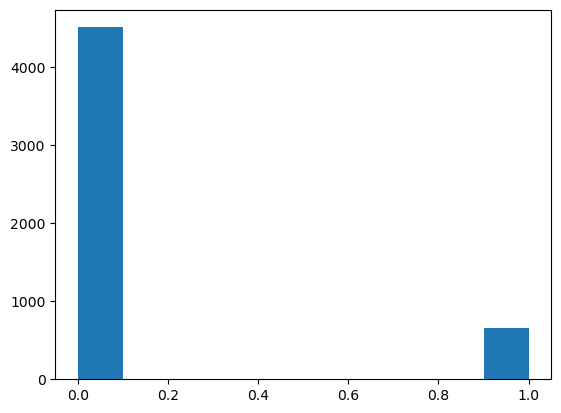

In [33]:
plt.hist(df["target"],label=("ham", "spam"))
plt.show()